In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tech = pd.read_csv('technologies.csv')

In [3]:
ref = pd.read_csv('reference.csv')

In [4]:
tech.head()

,Volume,Category,Index,Technology,Stage
0,1,Techniques,1,Continuous deployment,ASSESS
1,1,Techniques,2,Incremental data warehousing,ASSESS
2,1,Techniques,3,Evolutionary architecture,ASSESS
3,1,Techniques,4,Evolutionary database,TRIAL
4,1,Techniques,5,Web as platform,TRIAL


In [5]:
ref.head()

,Volume,Month,Link
0,1,Jan-10,https://assets.thoughtworks.com/assets/technol...
1,2,Apr-10,https://assets.thoughtworks.com/assets/technol...
2,3,Aug-10,https://assets.thoughtworks.com/assets/technol...
3,4,Jan-11,https://assets.thoughtworks.com/assets/technol...
4,5,Jul-11,https://assets.thoughtworks.com/assets/technol...


In [6]:
tech_v2 = pd.merge(tech, ref, on='Volume', how='outer')
tech_v2 = tech_v2.drop(columns = "Link")
tech_v2.head()

,Volume,Category,Index,Technology,Stage,Month
0,1,Techniques,1,Continuous deployment,ASSESS,Jan-10
1,1,Techniques,2,Incremental data warehousing,ASSESS,Jan-10
2,1,Techniques,3,Evolutionary architecture,ASSESS,Jan-10
3,1,Techniques,4,Evolutionary database,TRIAL,Jan-10
4,1,Techniques,5,Web as platform,TRIAL,Jan-10


In [7]:
tech_v2.loc[tech_v2['Technology'] == 'Python 3']

,Volume,Category,Index,Technology,Stage,Month
729,9,Languages,90,Python 3,ASSESS,Jan-14
834,10,Languages,100,Python 3,ASSESS,Jul-14
1433,16,Languages,79,Python 3,ADOPT,Mar-17
1535,17,Languages,77,Python 3,ADOPT,Nov-17


In [8]:
tech_v2.loc[tech_v2['Technology'] == 'Heroku']

,Volume,Category,Index,Technology,Stage,Month
211,4,Platforms,45,Heroku,TRIAL,Jan-11
301,5,Platforms,61,Heroku,TRIAL,Jul-11
393,6,Platforms,69,Heroku,TRIAL,Mar-12


In [9]:
tech_v2.loc[tech_v2['Technology'] == 'Git']

,Volume,Category,Index,Technology,Stage,Month
128,3,Tools,32,Git,TRIAL,Aug-10
198,4,Tools,32,Git,TRIAL,Jan-11
271,5,Tools,31,Git,ADOPT,Jul-11
359,6,Tools,35,Git,ADOPT,Mar-12


In [10]:
tech_v2.loc[tech_v2['Technology'] == 'Android']

,Volume,Category,Index,Technology,Stage,Month
24,1,Platforms,25,Android,TRIAL,Jan-10
83,2,Platforms,46,Android,TRIAL,Apr-10
162,3,Platforms,66,Android,ADOPT,Aug-10
209,4,Platforms,43,Android,ADOPT,Jan-11


In [11]:
tech_v2.loc[tech_v2['Technology'] == 'Chrome']

,Volume,Category,Index,Technology,Stage,Month
36,1,Platforms,37,Chrome,ASSESS,Jan-10


In [12]:
tech_v2.loc[tech_v2['Technology'] == 'Github']

,Volume,Category,Index,Technology,Stage,Month
117,3,Tools,21,Github,ASSESS,Aug-10
201,4,Tools,35,Github,ASSESS,Jan-11
273,5,Tools,33,Github,ADOPT,Jul-11
360,6,Tools,36,Github,ADOPT,Mar-12


In [13]:
n = 30
tech_v2['Technology'].value_counts()[:n].index.tolist()

['Clojure',
 'AngularJS',
 'Azure',
 'Scala',
 'WS-*',
 'Apache Mesos',
 'Consul',
 'Evolutionary database',
 'Spring Boot',
 'F#',
 'JavaScript as a first class language',
 'HTML5',
 'Overambitious API gateways',
 'Node.js',
 'Emergent design',
 'Micro frontends',
 'Evolutionary architecture',
 'Focus on mean time to recovery',
 'Next gen test tools',
 'Nancy',
 'Docker',
 'Subversion',
 'Scrum certification',
 'CMS as a platform',
 'TOTP Two-Factor Authentication',
 'GWT',
 'Linux security modules',
 'React.js',
 'Visualization and metrics',
 'Database based integration']

In [14]:
tech_v2.loc[tech_v2['Technology'] == 'Clojure']

,Volume,Category,Index,Technology,Stage,Month
74,2,Languages,37,Clojure,ASSESS,Apr-10
135,3,Languages,39,Clojure,ASSESS,Aug-10
240,4,Languages,74,Clojure,ASSESS,Jan-11
321,5,Languages,81,Clojure,ASSESS,Jul-11
418,6,Languages,94,Clojure,TRIAL,Mar-12
512,7,Languages,85,Clojure,ADOPT,Oct-12
617,8,Languages,81,Clojure,ADOPT,May-13
713,9,Languages,74,Clojure,ADOPT,Jan-14


In [15]:
tech_v2.loc[tech_v2['Technology'] == 'TOTP Two-Factor Authentication']

,Volume,Category,Index,Technology,Stage,Month
778,10,Platforms,44,TOTP Two-Factor Authentication,ASSESS,Jul-14
888,11,Platforms,47,TOTP Two-Factor Authentication,ASSESS,Jan-15
973,12,Platforms,28,TOTP Two-Factor Authentication,TRIAL,May-15
1068,13,Platforms,31,TOTP Two-Factor Authentication,ADOPT,Nov-15
1168,14,Platforms,29,TOTP Two-Factor Authentication,ADOPT,Apr-16


In [16]:
tech_v2.loc[tech_v2['Technology'] == 'HTML5']

,Volume,Category,Index,Technology,Stage,Month
29,1,Platforms,30,HTML5,ASSESS,Jan-10
76,2,Languages,39,HTML5,ASSESS,Apr-10
136,3,Languages,40,HTML5,ASSESS,Aug-10
237,4,Languages,71,HTML5,TRIAL,Jan-11
315,5,Languages,75,HTML5,ADOPT,Jul-11
416,6,Languages,92,HTML5,ADOPT,Mar-12


In [17]:
tech_v2.Category.unique()

array(['Techniques', 'Tools', 'Languages', 'Platforms'], dtype=object)

In [18]:
count_cat = tech_v2.groupby(['Category', 'Month', 'Volume']).size()

tech_v3 = count_cat.to_frame(name = 'size').reset_index()

tech_v3.head()

,Category,Month,Volume,size
0,Languages,Apr-10,2,10
1,Languages,Apr-16,14,25
2,Languages,Apr-19,20,31
3,Languages,Aug-10,3,11
4,Languages,Jan-10,1,6


[]

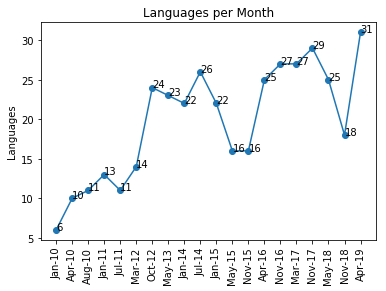

In [19]:
tech_v3_languages = tech_v3[tech_v3['Category'] == 'Languages']
tech_v3_languages = tech_v3_languages.sort_values(by=['Volume'])


plt.plot(tech_v3_languages['Month'], tech_v3_languages['size'], '-o')
plt.xticks(rotation='vertical')
plt.title('Languages per Month')
plt.ylabel('Languages')
for i,j in zip(tech_v3_languages['Month'],tech_v3_languages['size']):
    plt.annotate(str(j),xy=(i,j))
plt.plot()

[]

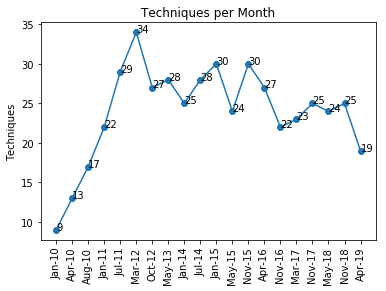

In [20]:
tech_v3_techniques = tech_v3[tech_v3['Category'] == 'Techniques']
tech_v3_techniques = tech_v3_techniques.sort_values(by=['Volume'])


plt.plot(tech_v3_techniques['Month'], tech_v3_techniques['size'], '-o')
plt.xticks(rotation='vertical')
plt.title('Techniques per Month')

plt.ylabel('Techniques')
for i,j in zip(tech_v3_techniques['Month'],tech_v3_techniques['size']):
    plt.annotate(str(j),xy=(i,j))
plt.plot()

[]

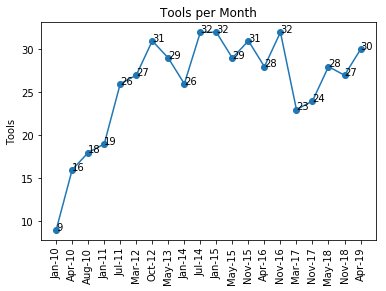

In [21]:
tech_v3_tools = tech_v3[tech_v3['Category'] == 'Tools']
tech_v3_tools = tech_v3_tools.sort_values(by=['Volume'])


plt.plot(tech_v3_tools['Month'], tech_v3_tools['size'], '-o')
plt.xticks(rotation='vertical')
plt.title('Tools per Month')
plt.ylabel('Tools')
for i,j in zip(tech_v3_tools['Month'],tech_v3_tools['size']):
    plt.annotate(str(j),xy=(i,j))
plt.plot()

[]

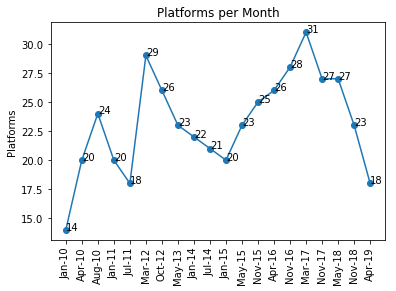

In [22]:
tech_v3_platforms = tech_v3[tech_v3['Category'] == 'Platforms']
tech_v3_platforms = tech_v3_platforms.sort_values(by=['Volume'])


plt.plot(tech_v3_platforms['Month'], tech_v3_platforms['size'], '-o')
plt.xticks(rotation='vertical')
plt.title('Platforms per Month')
plt.ylabel('Platforms')
for i,j in zip(tech_v3_platforms['Month'],tech_v3_platforms['size']):
    plt.annotate(str(j),xy=(i,j))

plt.plot()

[]

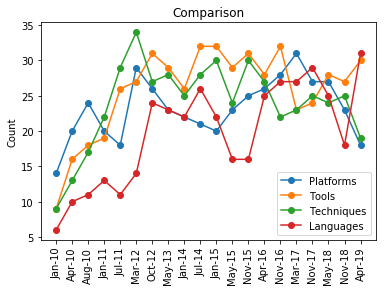

In [23]:
plt.plot(tech_v3_platforms['Month'], tech_v3_platforms['size'], '-o', label = 'Platforms')
plt.plot(tech_v3_tools['Month'], tech_v3_tools['size'], '-o', label = 'Tools')
plt.plot(tech_v3_techniques['Month'], tech_v3_techniques['size'], '-o', label = 'Techniques')
plt.plot(tech_v3_languages['Month'], tech_v3_languages['size'], '-o', label = 'Languages')


plt.xticks(rotation='vertical')
plt.title('Comparison')
plt.legend()
plt.ylabel('Count')


plt.plot()

In [24]:
count_cat2 = tech_v2.groupby(['Category', 'Month', 'Volume', 'Stage']).size()

tech_v4 = count_cat2.to_frame(name = 'size').reset_index()

tech_v4.head()

,Category,Month,Volume,Stage,size
0,Languages,Apr-10,2,ADOPT,3
1,Languages,Apr-10,2,ASSESS,5
2,Languages,Apr-10,2,TRIAL,2
3,Languages,Apr-16,14,ADOPT,4
4,Languages,Apr-16,14,ASSESS,10


[]

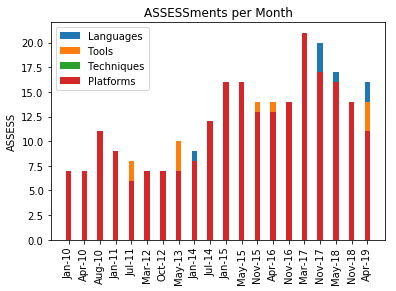

In [25]:
tech_v4_assess = tech_v4[tech_v4['Stage'] == 'ASSESS']
tech_v4_assess_languages = tech_v4_assess[tech_v4_assess['Category'] == 'Languages']
tech_v4_assess_tools = tech_v4_assess[tech_v4_assess['Category'] == 'Tools']
tech_v4_assess_techniques = tech_v4_assess[tech_v4_assess['Category'] == 'Techniques']
tech_v4_assess_platforms = tech_v4_assess[tech_v4_assess['Category'] == 'Platforms']

tech_v4_assess_languages = tech_v4_assess_languages.sort_values(by=['Volume'])
tech_v4_assess_tools = tech_v4_assess_tools.sort_values(by=['Volume'])
tech_v4_assess_techniques = tech_v4_assess_techniques.sort_values(by=['Volume'])
tech_v4_assess_platforms = tech_v4_assess_platforms.sort_values(by=['Volume'])

width = 0.35
p1 = plt.bar(tech_v4_assess_languages['Month'], tech_v4_assess_languages['size'], width, label = 'Languages')
p2 = plt.bar(tech_v4_assess_tools['Month'], tech_v4_assess_tools['size'], width, label = 'Tools')
p3 = plt.bar(tech_v4_assess_techniques['Month'], tech_v4_assess_techniques['size'], width, label = 'Techniques')
p4 = plt.bar(tech_v4_assess_platforms['Month'], tech_v4_assess_platforms['size'], width, label = 'Platforms')


plt.xticks(rotation='vertical')

plt.title('ASSESSments per Month')
plt.ylabel('ASSESS')
plt.legend()

plt.plot()

[]

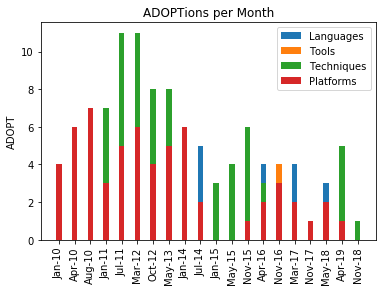

In [26]:
tech_v4_adopt = tech_v4[tech_v4['Stage'] == 'ADOPT']
tech_v4_adopt_languages = tech_v4_adopt[tech_v4_adopt['Category'] == 'Languages']
tech_v4_adopt_tools = tech_v4_adopt[tech_v4_adopt['Category'] == 'Tools']
tech_v4_adopt_techniques = tech_v4_adopt[tech_v4_adopt['Category'] == 'Techniques']
tech_v4_adopt_platforms = tech_v4_adopt[tech_v4_adopt['Category'] == 'Platforms']

tech_v4_adopt_languages = tech_v4_adopt_languages.sort_values(by=['Volume'])
tech_v4_adopt_tools = tech_v4_adopt_tools.sort_values(by=['Volume'])
tech_v4_adopt_techniques = tech_v4_adopt_techniques.sort_values(by=['Volume'])
tech_v4_adopt_platforms = tech_v4_adopt_platforms.sort_values(by=['Volume'])

width = 0.35
p1 = plt.bar(tech_v4_adopt_languages['Month'], tech_v4_adopt_languages['size'], width, label = 'Languages')
p2 = plt.bar(tech_v4_adopt_tools['Month'], tech_v4_adopt_tools['size'], width, label = 'Tools')
p3 = plt.bar(tech_v4_adopt_techniques['Month'], tech_v4_adopt_techniques['size'], width, label = 'Techniques')
p4 = plt.bar(tech_v4_adopt_platforms['Month'], tech_v4_adopt_platforms['size'], width, label = 'Platforms')


plt.xticks(rotation='vertical')

plt.title('ADOPTions per Month')
plt.ylabel('ADOPT')
plt.legend()

plt.plot()

[]

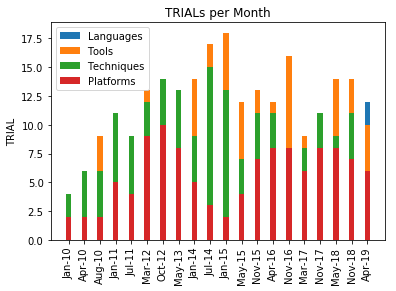

In [27]:
tech_v4_trial = tech_v4[tech_v4['Stage'] == 'TRIAL']
tech_v4_trial_languages = tech_v4_trial[tech_v4_trial['Category'] == 'Languages']
tech_v4_trial_tools = tech_v4_trial[tech_v4_trial['Category'] == 'Tools']
tech_v4_trial_techniques = tech_v4_trial[tech_v4_trial['Category'] == 'Techniques']
tech_v4_trial_platforms = tech_v4_trial[tech_v4_trial['Category'] == 'Platforms']

tech_v4_trial_languages = tech_v4_trial_languages.sort_values(by=['Volume'])
tech_v4_trial_tools = tech_v4_trial_tools.sort_values(by=['Volume'])
tech_v4_trial_techniques = tech_v4_trial_techniques.sort_values(by=['Volume'])
tech_v4_trial_platforms = tech_v4_trial_platforms.sort_values(by=['Volume'])

width = 0.35
p1 = plt.bar(tech_v4_trial_languages['Month'], tech_v4_trial_languages['size'], width, label = 'Languages')
p2 = plt.bar(tech_v4_trial_tools['Month'], tech_v4_trial_tools['size'], width, label = 'Tools')
p3 = plt.bar(tech_v4_trial_techniques['Month'], tech_v4_trial_techniques['size'], width, label = 'Techniques')
p4 = plt.bar(tech_v4_trial_platforms['Month'], tech_v4_trial_platforms['size'], width, label = 'Platforms')


plt.xticks(rotation='vertical')

plt.title('TRIALs per Month')
plt.ylabel('TRIAL')
plt.legend()

plt.plot()

[]

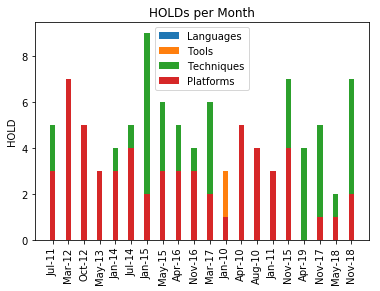

In [28]:
tech_v4_hold = tech_v4[tech_v4['Stage'] == 'HOLD']
tech_v4_hold_languages = tech_v4_hold[tech_v4_hold['Category'] == 'Languages']
tech_v4_hold_tools = tech_v4_hold[tech_v4_hold['Category'] == 'Tools']
tech_v4_hold_techniques = tech_v4_hold[tech_v4_hold['Category'] == 'Techniques']
tech_v4_hold_platforms = tech_v4_hold[tech_v4_hold['Category'] == 'Platforms']

tech_v4_hold_languages = tech_v4_hold_languages.sort_values(by=['Volume'])
tech_v4_hold_tools = tech_v4_hold_tools.sort_values(by=['Volume'])
tech_v4_hold_techniques = tech_v4_hold_techniques.sort_values(by=['Volume'])
tech_v4_hold_platforms = tech_v4_hold_platforms.sort_values(by=['Volume'])

width = 0.35
p1 = plt.bar(tech_v4_hold_languages['Month'], tech_v4_hold_languages['size'], width, label = 'Languages')
p2 = plt.bar(tech_v4_hold_tools['Month'], tech_v4_hold_tools['size'], width, label = 'Tools')
p3 = plt.bar(tech_v4_hold_techniques['Month'], tech_v4_hold_techniques['size'], width, label = 'Techniques')
p4 = plt.bar(tech_v4_hold_platforms['Month'], tech_v4_hold_platforms['size'], width, label = 'Platforms')


plt.xticks(rotation='vertical')

plt.title('HOLDs per Month')
plt.ylabel('HOLD')
plt.legend()

plt.plot()

In [29]:
pivtab = pd.pivot_table(tech_v4,values = 'size', columns = ['Category', 'Stage'], index = ['Volume', 'Month'], aggfunc = np.sum)

In [30]:
pivtab

Category      Languages                   Platforms                    \
Stage             ADOPT ASSESS HOLD TRIAL     ADOPT ASSESS HOLD TRIAL   
Volume Month                                                            
1      Jan-10       1.0    3.0  NaN   2.0       4.0    7.0  1.0   2.0   
2      Apr-10       3.0    5.0  NaN   2.0       6.0    7.0  5.0   2.0   
3      Aug-10       4.0    5.0  NaN   2.0       7.0   11.0  4.0   2.0   
4      Jan-11       5.0    3.0  NaN   5.0       3.0    9.0  3.0   5.0   
5      Jul-11       2.0    3.0  1.0   5.0       5.0    6.0  3.0   4.0   
6      Mar-12       3.0    4.0  2.0   5.0       6.0    7.0  7.0   9.0   
7      Oct-12       4.0    6.0  4.0  10.0       4.0    7.0  5.0  10.0   
8      May-13       5.0    7.0  3.0   8.0       5.0    7.0  3.0   8.0   
9      Jan-14       4.0    9.0  3.0   6.0       6.0    8.0  3.0   5.0   
10     Jul-14       5.0   10.0  2.0   9.0       2.0   12.0  4.0   3.0   
11     Jan-15       2.0    8.0  1.0  11.0       NaN   16.0  2.0   2.0   
12     May-15       1.0    6.0  1.0   8.0       NaN   16.0  3.0   4.0   
13     Nov-15       3.0    9.0  NaN   4.0       1.0   13.0  4.0   7.0   
14     Apr-16       4.0   10.0  1.0  10.0       2.0   13.0  3.0   8.0   
15     Nov-16       4.0   12.0  2.0   9.0       3.0   14.0  3.0   8.0   
16     Mar-17       4.0   14.0  1.0   8.0       2.0   21.0  2.0   6.0   
17     Nov-17       1.0   20.0  NaN   8.0       1.0   17.0  1.0   8.0   
18     May-18       3.0   17.0  NaN   5.0       2.0   16.0  1.0   8.0   
19     Nov-18       NaN   14.0  NaN   4.0       NaN   14.0  2.0   7.0   
20     Apr-19       3.0   16.0  NaN  12.0       1.0   11.0  NaN   6.0   

Category      Techniques                   Tools                    
Stage              ADOPT ASSESS HOLD TRIAL ADOPT ASSESS HOLD TRIAL  
Volume Month                                                        
1      Jan-10        2.0    3.0  NaN   4.0   2.0    1.0  3.0   3.0  
2      Apr-10        4.0    2.0  1.0   6.0   3.0    6.0  2.0   5.0  
3      Aug-10        7.0    2.0  2.0   6.0   3.0    4.0  2.0   9.0  
4      Jan-11        7.0    2.0  2.0  11.0   3.0    8.0  1.0   7.0  
5      Jul-11       11.0    4.0  5.0   9.0   5.0    8.0  4.0   9.0  
6      Mar-12       11.0    5.0  6.0  12.0   3.0    6.0  5.0  13.0  
7      Oct-12        8.0    1.0  4.0  14.0   7.0    7.0  3.0  14.0  
8      May-13        8.0    6.0  1.0  13.0   8.0   10.0  3.0   8.0  
9      Jan-14        5.0    7.0  4.0   9.0   2.0    7.0  3.0  14.0  
10     Jul-14        2.0    6.0  5.0  15.0   2.0   11.0  2.0  17.0  
11     Jan-15        3.0    5.0  9.0  13.0   2.0   11.0  1.0  18.0  
12     May-15        4.0    7.0  6.0   7.0   4.0   12.0  1.0  12.0  
13     Nov-15        6.0    6.0  7.0  11.0   3.0   14.0  1.0  13.0  
14     Apr-16        3.0    8.0  5.0  11.0   1.0   14.0  1.0  12.0  
15     Nov-16        3.0    8.0  4.0   7.0   4.0   11.0  1.0  16.0  
16     Mar-17        1.0    8.0  6.0   8.0   2.0   12.0  NaN   9.0  
17     Nov-17        1.0    8.0  5.0  11.0   1.0   15.0  NaN   8.0  
18     May-18        1.0   12.0  2.0   9.0   NaN   14.0  NaN  14.0  
19     Nov-18        1.0    6.0  7.0  11.0   NaN   13.0  NaN  14.0  
20     Apr-19        5.0    4.0  4.0   6.0   5.0   14.0  1.0  10.0